In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# SVC 모델 불러오기
from sklearn import svm
from sklearn.model_selection import train_test_split

#model = svm.SVC()

In [3]:
# CSV 파일 가져오기
from google.colab import files
uploaded = files.upload()



Saving final_crawled_api_data.csv to final_crawled_api_data.csv


In [4]:
df_cloudSea = pd.read_csv('final_crawled_api_data.csv')
df_cloudSea

,title,link,mountain,upload_to,운해 여부,위치,전날 기온,전날 강수량,전날 습도,전날 기압,일출 기온,일출 풍속,일출 습도,일출 기압,일출 전운량,일교차
0,오늘 일출과 운해,https://cafe.naver.com/windstopper/ArticleRead...,[‘심항산’],20230508.0,1.0,충주,5.8,0.0,84.0,1001.4,3.2,0.0,93.0,1003.0,0.0,-2.6
1,"노동절 새벽, 월출산의 운해일출",https://cafe.naver.com/windstopper/ArticleRead...,['월출산'],20230501.0,1.0,강진,8.9,0.0,91.0,1012.2,9.3,0.8,92.0,1012.4,7.0,0.4
2,백운대 일출산행(feat. 운해사냥),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],20230501.0,1.0,서울,12.1,0.0,87.0,1001.3,10.1,2.4,91.0,1002.7,7.0,-2.0
3,백운대 운해사냥성공(thanks to또민아빠님),https://cafe.naver.com/windstopper/ArticleRead...,[‘북한산'],20230430.0,1.0,서울,10.0,0.0,83.0,998.3,7.9,2.5,87.0,998.9,0.0,-2.1
4,지금 이 순간(역대급 제비봉 운해),https://cafe.naver.com/windstopper/ArticleRead...,[‘제비봉’],20230427.0,1.0,제천,1.7,0.0,100.0,987.3,-0.3,0.0,100.0,989.1,10.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2008/1/27.,https://cafe.naver.com/windstopper/ArticleRead...,['태백산'],20080127.0,0.0,태백,-10.8,0.0,89.0,941.9,-13.1,0.3,87.0,941.8,0.0,-2.3
803,12.31~ 1.1 설악산 일출산행,https://cafe.naver.com/windstopper/ArticleRead...,['설악산'],20061231.0,0.0,인제,-4.5,0.0,61.0,1008.7,-7.0,0.6,72.0,1008.7,0.0,-2.5
804,""" 부산 황령산에서 바라본 일출 """,https://cafe.naver.com/windstopper/ArticleRead...,['황령산'],20070102.0,0.0,부산,8.5,0.0,76.0,1015.7,7.7,0.3,85.0,1015.7,0.0,-0.8
805,060101남덕유산 일출산행,https://cafe.naver.com/windstopper/ArticleRead...,"['남덕유산', '일출산']",20070101.0,0.0,금산,-5.0,0.0,73.0,1009.7,-5.8,0.0,83.0,1009.7,0.0,-0.8


In [5]:
column_to_drop = ['title', 'link', 'upload_to', 'mountain', '위치']
df_cloudSea = df_cloudSea.drop(columns = column_to_drop)
df_cloudSea

,운해 여부,전날 기온,전날 강수량,전날 습도,전날 기압,일출 기온,일출 풍속,일출 습도,일출 기압,일출 전운량,일교차
0,1.0,5.8,0.0,84.0,1001.4,3.2,0.0,93.0,1003.0,0.0,-2.6
1,1.0,8.9,0.0,91.0,1012.2,9.3,0.8,92.0,1012.4,7.0,0.4
2,1.0,12.1,0.0,87.0,1001.3,10.1,2.4,91.0,1002.7,7.0,-2.0
3,1.0,10.0,0.0,83.0,998.3,7.9,2.5,87.0,998.9,0.0,-2.1
4,1.0,1.7,0.0,100.0,987.3,-0.3,0.0,100.0,989.1,10.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
802,0.0,-10.8,0.0,89.0,941.9,-13.1,0.3,87.0,941.8,0.0,-2.3
803,0.0,-4.5,0.0,61.0,1008.7,-7.0,0.6,72.0,1008.7,0.0,-2.5
804,0.0,8.5,0.0,76.0,1015.7,7.7,0.3,85.0,1015.7,0.0,-0.8
805,0.0,-5.0,0.0,73.0,1009.7,-5.8,0.0,83.0,1009.7,0.0,-0.8


In [ ]:
nan_rows = df_cloudSea[df_cloudSea.isna().any(axis=1)]
print(nan_rows)

     운해 여부  전날 기온  전날 강수량  전날 습도   전날 기압  일출 기온  일출 풍속  일출 습도   일출 기압  일출 전운량  \
246    1.0  -10.9     0.0   90.0  1003.7  -12.7    NaN   88.0  1004.5     0.0   
474    0.0   -6.5     0.0    NaN  1010.5   -9.7    0.7    NaN  1011.7     0.0   
806    NaN    NaN     NaN    NaN     NaN    NaN    NaN    NaN     NaN     NaN   

     일교차  
246 -1.8  
474 -3.2  
806  NaN  


In [8]:
df_cloudSea = df_cloudSea.dropna()
df_cloudSea

,운해 여부,전날 기온,전날 강수량,전날 습도,전날 기압,일출 기온,일출 풍속,일출 습도,일출 기압,일출 전운량,일교차
0,1.0,5.8,0.0,84.0,1001.4,3.2,0.0,93.0,1003.0,0.0,-2.6
1,1.0,8.9,0.0,91.0,1012.2,9.3,0.8,92.0,1012.4,7.0,0.4
2,1.0,12.1,0.0,87.0,1001.3,10.1,2.4,91.0,1002.7,7.0,-2.0
3,1.0,10.0,0.0,83.0,998.3,7.9,2.5,87.0,998.9,0.0,-2.1
4,1.0,1.7,0.0,100.0,987.3,-0.3,0.0,100.0,989.1,10.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
801,1.0,24.0,0.0,90.0,990.1,24.1,0.0,90.0,989.8,0.0,0.1
802,0.0,-10.8,0.0,89.0,941.9,-13.1,0.3,87.0,941.8,0.0,-2.3
803,0.0,-4.5,0.0,61.0,1008.7,-7.0,0.6,72.0,1008.7,0.0,-2.5
804,0.0,8.5,0.0,76.0,1015.7,7.7,0.3,85.0,1015.7,0.0,-0.8


In [9]:
feature_columns = df_cloudSea.columns.difference(['운해 여부'])

X = df_cloudSea[feature_columns]
y = df_cloudSea['운해 여부']

# 데이터를 훈련 데이터와 검증 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 선형 SVC 모델
dt = svm.SVC(kernel='linear', random_state=100)
dt.fit(X_train, y_train)

SVC(kernel='linear', random_state=100)

In [10]:
# 예측 및 정확도 측정
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.640495867768595


In [11]:
# 특성 가중치 확인
# SVM 모델의 특성 중요도를 정확하게 측정하는 것은 어려우며, 다른 모델이나 분석 방법을 사용하는 것이 더 적절할 수도 있다.

feature_importance = pd.Series(abs(dt.coef_.ravel()), index=X.columns)
print(feature_importance)

일교차       0.068692
일출 기압     0.084554
일출 기온     0.053371
일출 습도     0.013015
일출 전운량    0.051250
일출 풍속     0.067835
전날 강수량    0.086160
전날 기압     0.097365
전날 기온     0.015320
전날 습도     0.038972
dtype: float64


In [12]:
# + 시각화: feature 가 여러개라 2차원으로 시각화가 어렵다.
# 차원 축소 기법: 차원 축소 기법을 사용하여 feature를 2차원으로 변환한 후 데이터와 결정 경계를 시각화합니다.
from sklearn.decomposition import PCA

# 차원 축소
pca = PCA(n_components=2)
X_2d_train = pca.fit_transform(X_train)
X_2d_test = pca.fit_transform(X_test)

dt.fit(X_2d_train, y_train)

SVC(kernel='linear', random_state=100)

In [13]:
# 변수를 전부 차원축소해서 정확도가 엄청 떨어지는데..

y_pred = dt.predict(X_2d_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.45454545454545453


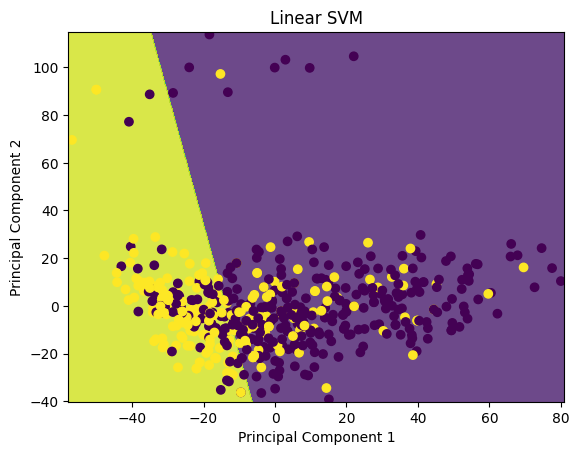

In [14]:
# 결정 경계 그리기
x_min, x_max = X_2d_train[:, 0].min() - 1, X_2d_train[:, 0].max() + 1
y_min, y_max = X_2d_train[:, 1].min() - 1, X_2d_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 데이터 및 결정 경계 시각화
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Linear SVM')
plt.show()